In [1]:
import seaborn as sns
import json
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 


In [4]:
def get_accuracy(pred_file):
    with open(pred_file) as f1:
        pred_data = json.load(f1)
    total = len(pred_data)
    correct_examples = []
    incorrect_examples = []

    for example in pred_data:
        max_pred = np.argmax(example['pred'])
        true_label = example['true']
        if max_pred == true_label: 
            correct_examples.append(example)
        else:
            incorrect_examples.append(example)

    acc = len(correct_examples) / total 
    return acc, correct_examples, incorrect_examples

In [26]:

acc_dataframe = pd.DataFrame(columns=['train', 'function', 'variable', 'value'], dtype='object')
acc_upsample = []

for seed in [12]:
    for num in [750, 1500, 3000, 7500, 15000, 18000]:
        for fxn_num in [15]:
            acc, correct, incorrect = get_accuracy(f"/brtx/603-nvme1/estengel/intent/50/{seed}_seed/{num}_{fxn_num}/{num}_{fxn_num}_{seed}_seed_predictions.json")
            acc_up, __, __ = get_accuracy(f"/brtx/605-nvme1/estengel/intent_upsample_32.0/50/{seed}_seed/{num}_{fxn_num}/{num}_{fxn_num}_{seed}_seed_predictions.json") 
            acc_rem, __, __ = get_accuracy(f"/brtx/604-nvme1/estengel/intent_no_source_triggers/50/{seed}_seed/{num}_{fxn_num}/{num}_{fxn_num}_{seed}_seed_predictions.json") 
            acc_dataframe = acc_dataframe.append({"train": str(num), "function": fxn_num, "variable": "no upsample", "value": acc}, ignore_index=True)
            acc_dataframe = acc_dataframe.append({"train": str(num), "function": fxn_num, "variable": "upsample", "value": acc_up}, ignore_index=True)
            acc_dataframe = acc_dataframe.append({"train": str(num), "function": fxn_num, "variable": "remove", "value": acc_rem}, ignore_index=True)

            #acc_no_upsample.append(acc)
#print(f"accuracy: {acc:.2%}")

<AxesSubplot:xlabel='train', ylabel='value'>

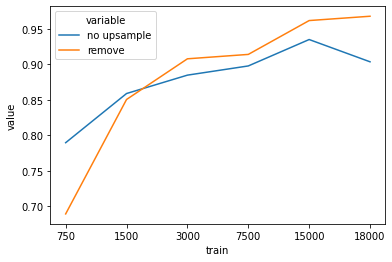

In [27]:

sns.lineplot(data=acc_dataframe[acc_dataframe['function'] == 15], x = "train", y = "value", hue="variable")

In [33]:
from source_lookup import get_data, tokenize, get_probs, get_max_probs



data = tokenize(get_data())
__, probs = get_probs(data, exclude_function=True)
max_probs = get_max_probs(probs, 3)

avg_dict = {k: np.mean([x[1] for x in v]) for k, v in max_probs.items()}
avg_items = sorted(avg_dict.items(), key = lambda x: x[1])
print(avg_items)

# print(max_probs)  


Using custom data configuration default
Reusing dataset nlu_evaluation_data (/home/estengel/.cache/huggingface/datasets/nlu_evaluation_data/default/1.1.0/0416a5876d8240bd571f2bc2ad421cf6e6e88d938f8dcb5fd87b5af6033d6282)


lock path /home/estengel/.cache/huggingface/datasets/_home_estengel_.cache_huggingface_datasets_nlu_evaluation_data_default_1.1.0_0416a5876d8240bd571f2bc2ad421cf6e6e88d938f8dcb5fd87b5af6033d6282.lock


  0%|          | 0/1 [00:00<?, ?it/s]

[(27, 0.1997549019607843), (16, 0.24585218702865763), (62, 0.26356589147286824), (4, 0.278118609406953), (7, 0.2791084497671324), (57, 0.28793774319066145), (52, 0.291005291005291), (46, 0.2918395573997234), (11, 0.2955823293172691), (9, 0.3018607856650586), (53, 0.30259822560202787), (44, 0.3041666666666667), (67, 0.31889516635279347), (35, 0.3380281690140845), (45, 0.354618015963512), (48, 0.3607192254495159), (60, 0.36379928315412186), (15, 0.3759332454984629), (59, 0.3764633394947628), (42, 0.37745098039215685), (56, 0.3806584362139918), (6, 0.38390804597701145), (58, 0.38392857142857145), (10, 0.38888888888888884), (54, 0.38955823293172687), (61, 0.40033500837520936), (8, 0.4127579737335835), (3, 0.4208333333333334), (50, 0.4216575922565033), (47, 0.4219409282700422), (32, 0.42328042328042326), (1, 0.4363143631436315), (51, 0.43915343915343913), (23, 0.44), (64, 0.4468468468468469), (43, 0.44806763285024154), (49, 0.45382585751978893), (5, 0.4583333333333333), (31, 0.4642857142857

In [36]:
print(max_probs[27])
print(max_probs[16])

[('to', 0.18106617647058823), ('you', 0.18290441176470587), ('i', 0.23529411764705882)]
[('contact', 0.2171945701357466), ('is', 0.2579185520361991), ('number', 0.26244343891402716)]
